# ⚠️ **Disclaimer**

*This is a simplified example provided solely for educational purposes. The analysis has not been optimized—for instance, missing values have not been addressed, and meaningful preprocessing steps have been omitted. As such, this should be viewed as a basic, incomplete, and potentially inaccurate illustration of the procurement process.*

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_empenhos = pd.read_csv('../procurement_auction_data/Empenhos.csv', encoding='ISO-8859-1', sep=';')
df_empenhos.head()

,Número Licitação,Código UG,Nome UG,Código Modalidade Compra,Modalidade Compra,Número Processo,Código Empenho,Data Emissão Empenho,Observação Empenho,Valor Empenho (R$)
0,12012,170120,DELEGACIA DA RFB EM CAMPOS GOYTACAZES,5,Pregão,15528000001201224,170120000012013NE800001,NaN,Sem informação,"0,00"
1,12012,170120,DELEGACIA DA RFB EM CAMPOS GOYTACAZES,5,Pregão,15528000001201224,170120000012014NE800013,08/01/2014,ATENDER DESPESAS COM SERVICOS DE MANUTENCAO EM...,"10,00"
2,12012,170120,DELEGACIA DA RFB EM CAMPOS GOYTACAZES,5,Pregão,15528000001201224,170120000012015NE800019,14/01/2015,ATENDER DESPESAS COM SERVICOS DE MANUTENCAO EM...,"10,00"
3,12012,510918,GERENCIA EXECUTIVA PASSO FUNDO,5,Pregão,35274000865201282,510918572022013NE800003,NaN,Sem informação,"0,00"
4,12012,580025,SUPERINT.FED.DE PESCA E AQUICULTURA/PB,5,Pregão,00365001949201230,580025000012013NE800001,NaN,Sem informação,"0,00"


Mapping of observations:
A -> Informação protegida por sigilo nos termos da legislação vigente
B -> ATENDER DESPESA COM O PRIMEIRO TERMO ADITIVO AO CONTRATO 10/2016 - SERVICOS  GRAFICOS ENEM 2017.                              PROCESSO 23036.002582/2015-41. PROC ORIGEM: 2016PR00006
C -> COMPLEMENTO REF A SERVICO DE APOIO ADM E TECNICO.               OF 2019.2169 (F). VALOR TOTAL DO CONTRATO: RS 304.113.338,38         CONTRATO 223/2017 // UASG 254445 // PROC ORIGEM: 2017PR00318
D -> ATENDER DESPESA COM SERVICOS ESPECIALIZADOS DE IMPLEMENTACAO, GERENCIAMENTO E ADMINISTRACAO DOS AUXILIOS ALIMENTACAO E REFEICAO VIA CARTAO ELETRONICO    P/ REDE EBSERH - UASG.155007 - PREGAO 14/2018 - PROC.23477.053375/2017-28 PRO
E -> ATENDER DESPESA COM A APLICACAO DO SAEB 2019 - CONTRATO 12/2019.       (SUBSTITUTO DA NE 2019NE800569 - APOS AJUSTE ORCAMENTARIO)          PROCESSO 23036.001025/2019-37. PROC ORIGEM: 05000062019
F -> ATENDER DESPESAS COM AQUISICAO DE ETANERCEPT 50MG/ML             SIN 25.873 PR

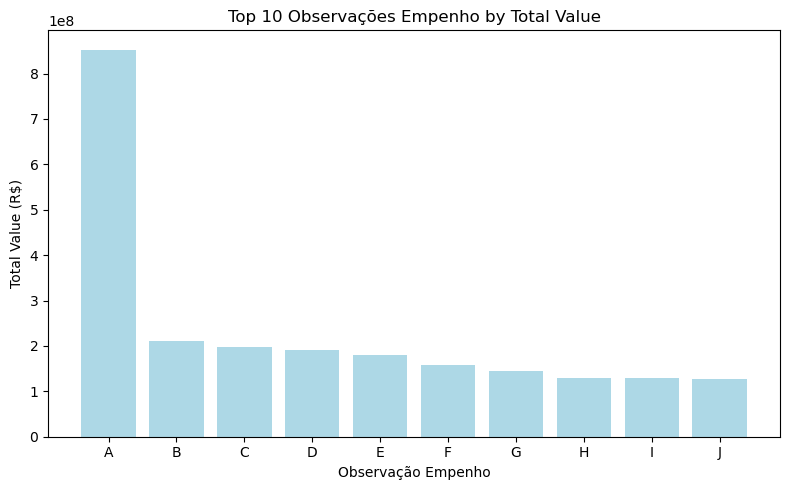

In [3]:
# Convert Valor Empenho to numeric, replacing comma with dot and handling any non-numeric values
df_empenhos['Valor Empenho (R$)'] = pd.to_numeric(df_empenhos['Valor Empenho (R$)'].str.replace(',', '.'), errors='coerce')

# Group by Observação Empenho and sum the values
top_observacoes = df_empenhos.groupby('Observação Empenho')['Valor Empenho (R$)'].sum().sort_values(ascending=False)

# Create mapping for top 10 observations
top_10_obs = top_observacoes.head(10)
mapping = {chr(65 + i): item for i, item in enumerate(top_10_obs.index)}
reverse_mapping = {item: key for key, item in mapping.items()}

# Print the mapping
print("Mapping of observations:")
for key, value in mapping.items():
    print(f"{key} -> {value}")

# Minimalistic bar plot of top 10 observations with mapped labels
plt.figure(figsize=(8, 5))
plt.bar(range(len(top_10_obs)), top_10_obs.values, color='lightblue')
plt.xticks(range(len(top_10_obs)), [reverse_mapping[item] for item in top_10_obs.index])
plt.ylabel('Total Value (R$)')
plt.xlabel('Observação Empenho')
plt.title('Top 10 Observações Empenho by Total Value')
plt.tight_layout()
plt.show()